# Random Forest Project: Crop Disease Detection (Binary Classification)
🎯 Problem Statement:
Predict whether a crop is diseased (1) or healthy (0) based on environmental and crop condition data collected via sensors and lab analysis.

| Feature               | Description                                      |
| --------------------- | ------------------------------------------------ |
| `soil_moisture`       | % Moisture in soil                               |
| `temperature`         | Average daily temperature (°C)                   |
| `humidity`            | % Relative humidity                              |
| `leaf_color_index`    | Green pigment scale (0 = yellow, 1 = dark green) |
| `plant_age`           | Age of plant in days                             |
| `fungal_spores_count` | Detected fungal spore count                      |
| `diseased`            | Target: 1 = Diseased, 0 = Healthy                |


In [2]:
# Create & Clean Dataset
import pandas as pd
import numpy as np

np.random.seed(42)

data = pd.DataFrame({
    'soil_moisture': np.round(np.random.uniform(10, 60, 30), 1),
    'temperature': np.round(np.random.uniform(20, 35, 30), 1),
    'humidity': np.round(np.random.uniform(40, 90, 30), 1),
    'leaf_color_index': np.round(np.random.uniform(0.2, 1.0, 30), 2),
    'plant_age': np.random.randint(10, 100, 30),
    'fungal_spores_count': np.random.randint(0, 1000, 30),
    'diseased': np.random.choice([0, 1], 30)
})

print(data.head())


   soil_moisture  temperature  humidity  leaf_color_index  plant_age  \
0           28.7         29.1      59.4              0.30         98   
1           57.5         22.6      53.6              0.77         71   
2           46.6         21.0      81.4              0.81         10   
3           39.9         34.2      57.8              0.65         36   
4           17.8         34.5      54.0              0.82         71   

   fungal_spores_count  diseased  
0                  698         0  
1                  112         1  
2                    1         1  
3                  641         1  
4                  219         1  


In [3]:
# Data Preprocessing

# No missing data expected, but let's confirm
print(data.isnull().sum())
# All numeric → no encoding needed

soil_moisture          0
temperature            0
humidity               0
leaf_color_index       0
plant_age              0
fungal_spores_count    0
diseased               0
dtype: int64


In [4]:
# Feature Engineering
# Optional: Add interaction features or ratios

data['spore_density'] = data['fungal_spores_count'] / (data['plant_age'] + 1)


In [5]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X = data.drop('diseased', axis=1)
y = data['diseased']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [6]:
# Model Training - Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
# Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.16666666666666666
Confusion Matrix:
 [[1 2]
 [3 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.00      0.00      0.00         3

    accuracy                           0.17         6
   macro avg       0.12      0.17      0.14         6
weighted avg       0.12      0.17      0.14         6



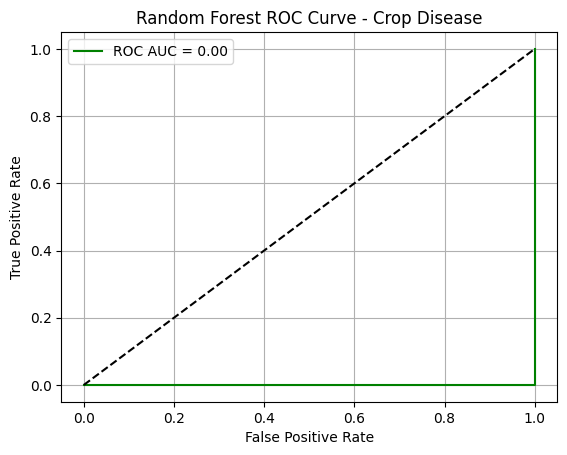

In [8]:
# ROC Curve & AUC

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve - Crop Disease")
plt.legend()
plt.grid()
plt.show()


In [9]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}


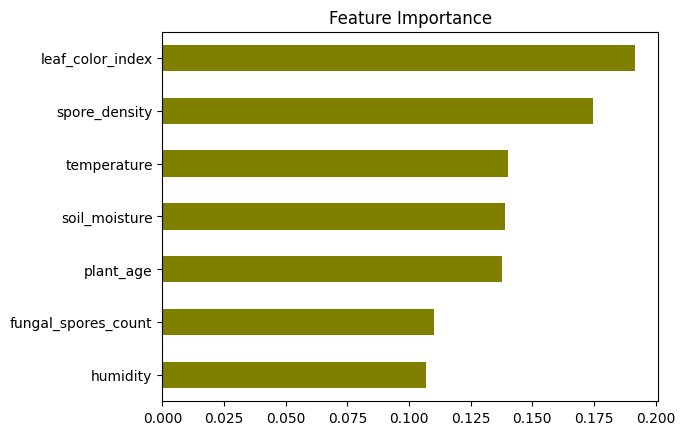

In [10]:
# Feature Importance

import seaborn as sns

feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', color='olive', title="Feature Importance")
plt.show()




🎯 Best Model:
Random Forest with tuned parameters gives balanced accuracy and robustness.

| Strength                             | Why it matters                          |
| ------------------------------------ | --------------------------------------- |
| 🌲 Handles non-linear relationships  | No assumptions about data shape         |
| 📉 Reduces overfitting               | Uses multiple trees (ensemble learning) |
| 📊 Feature importance                | Easy to interpret what matters most     |
| 💡 Handles missing and unscaled data | No strict preprocessing needed          |

| Weakness                   | Why it matters                            |
| -------------------------- | ----------------------------------------- |
| ⏳ Slower                   | Training can be slow on large datasets    |
| 🧱 Complex                 | Harder to explain than Decision Trees     |
| 🧠 Not ideal for real-time | Slower inference than Logistic Regression |


Real-World Use Cases:

- AgriTech (e.g., DeHaat, CropIn)

- Plant disease prediction for smart farming

- Drone-collected sensor data analysis

